In [2]:
%matplotlib inline
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_city
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

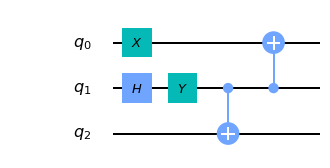

In [75]:
###Bell State
circ = QuantumCircuit(3)
circ.h(1)
circ.y(1)
circ.cx(1, 2)
circ.x(0)
circ.cx(1, 0)
circ.draw()

In [76]:
provider = IBMQ.get_provider(group='open')
backend = Aer.get_backend('statevector_simulator')

In [77]:
job = execute(circ, backend)
result = job.result()
counts = result.get_counts()

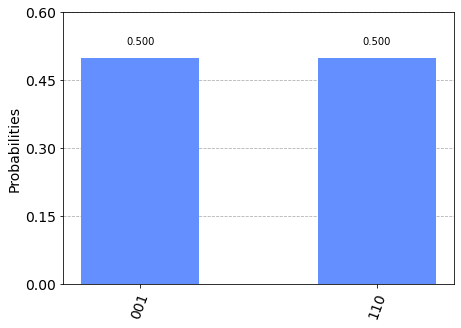

In [78]:
plot_histogram(counts)

[0.+0.j    0.-0.707j 0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.707j
 0.+0.j   ]


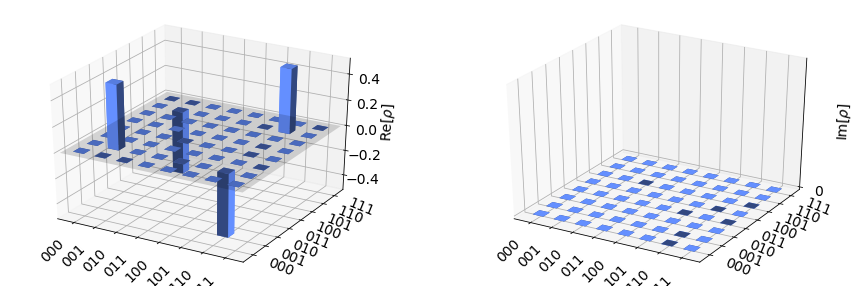

In [79]:
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)
plot_state_city(outputstate)

In [68]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

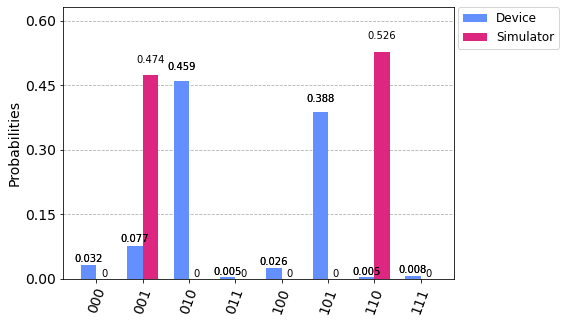

In [69]:
circ1 = QuantumCircuit(3)
circ1.h(1)
circ1.y(1)
circ1.cx(1, 2)
circ1.x(0)
circ1.cx(1, 0)
circ1.measure_all()
circ1.draw()


provider = IBMQ.get_provider(group='open')
backend = provider.get_backend('ibmq_london')
job = execute(circ1, backend)
result = job.result()

backend = provider.get_backend('ibmq_qasm_simulator')
job1 = execute(circ1, backend)
result1 = job1.result()

countsReal = result.get_counts()
countsSim = result1.get_counts()
plot_histogram([countsReal,countsSim], legend=['Device', 'Simulator'])

In [ ]:
1. Aplitudy stanu za pomocą statevector simulator. Poniżej przedstawiono wartości wektora aplitud stanu.
[0.+0.j    0.-0.707j 0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.707j 0.+0.j ]
alfa = 0 - 0.707i 
beta = 0 + 0.707i
Pozostałe wartości to 0.

2. Wartości otrzymane z funkcji plot_state_city() to macierz gęstości. Jest ona obliczana przy pomocy wzoru,
używając wartości z wektora aplitud stanu. Wartości macierzy gęstości zgadzają się ze wzorem.

|alfa|^2 = -0.5
alfa * beta` = 0.5
|beta|^2 = -0.5
alfa` * beta = 0.5

3. Wynik z symulatora został wykonany wielokrotnie, a następnie na histogramie przedstawione są wyniki.
Różnią się od tych, które mogą zostać wyliczone z aplitud stanu otrzymanych za pomocą statevector simulator,
ponieważ jest to próba doświadczalna. Jej wynik po wielokrotnym obliczeniu jest zbliżony do oczekiwanej
wartości, jednak nie jest identyczny. Pomiar sprawia, że uzyskiwany jest jeden konkretny stan.

4. Różnice w histogramie między prawdziwą maszyną kwantową, a symulatorem wynikają z tego, że na wynik
realnej maszyny mają wpływ błędy spowodawane tym, że w rzeczywistości stan idealny jest ciężko utrzymać.
Na symulator nie mają wpływu czynniki powodujące błąd.